In [240]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import json
import collections

In [241]:
url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/analytics/GetInjurySeverityCounts?"

#fromCaseYear=2014&toCaseYear=2015&state=1&county=&format=js
#fromCaseYear=2014&toCaseYear=2015&state=1&format=json
FromYear = "2005"
ToYear = "2018"
State = "6"
#
query_url = url + "fromCaseYear=" + FromYear + "&toCaseYear=" + ToYear + "&state=" + State + "&county=&format=json"
response = requests.get(query_url).json()
print(query_url)

https://crashviewer.nhtsa.dot.gov/CrashAPI/analytics/GetInjurySeverityCounts?fromCaseYear=2005&toCaseYear=2018&state=6&county=&format=json


In [242]:
#check results from query
pprint(response)

{'Count': 9,
 'Message': 'Results returned successfully',
 'Results': [[{'CaseYear': '2010',
               'CrashCounts': 2504,
               'TotalFatalCounts': 2720},
              {'CaseYear': '2011',
               'CrashCounts': 2617,
               'TotalFatalCounts': 2816},
              {'CaseYear': '2012',
               'CrashCounts': 2733,
               'TotalFatalCounts': 2966},
              {'CaseYear': '2013',
               'CrashCounts': 2860,
               'TotalFatalCounts': 3107},
              {'CaseYear': '2014',
               'CrashCounts': 2859,
               'TotalFatalCounts': 3102},
              {'CaseYear': '2015',
               'CrashCounts': 3123,
               'TotalFatalCounts': 3387},
              {'CaseYear': '2016',
               'CrashCounts': 3540,
               'TotalFatalCounts': 3837},
              {'CaseYear': '2017',
               'CrashCounts': 3569,
               'TotalFatalCounts': 3884},
              {'CaseYear': '2018',
   

In [243]:
#get results for test case state: California
results = (response["Results"][0])
Results = pd.DataFrame(results, columns =['CaseYear', 'CrashCounts', 'TotalFatalCounts'])
Results

,CaseYear,CrashCounts,TotalFatalCounts
0,2010,2504,2720
1,2011,2617,2816
2,2012,2733,2966
3,2013,2860,3107
4,2014,2859,3102
5,2015,3123,3387
6,2016,3540,3837
7,2017,3569,3884
8,2018,3259,3563


In [244]:
# collect query results for selected states --> result is series of dictionaries, I think?
states = {"6","8","12","17","36","39","42","48"}
FromYear = "2008"
ToYear = "2018"
Results2 = []
for State in states:
    query_url = url + "fromCaseYear=" + FromYear + "&toCaseYear=" + ToYear + "&state=" + State + "&county=" + "&format=json"
    response = requests.get(query_url).json()
    Results2.append(response["Results"][0])
    print(State)
    pprint(Results2)


17
[[{'CaseYear': '2010', 'CrashCounts': 858, 'TotalFatalCounts': 927},
  {'CaseYear': '2011', 'CrashCounts': 835, 'TotalFatalCounts': 918},
  {'CaseYear': '2012', 'CrashCounts': 886, 'TotalFatalCounts': 956},
  {'CaseYear': '2013', 'CrashCounts': 895, 'TotalFatalCounts': 991},
  {'CaseYear': '2014', 'CrashCounts': 845, 'TotalFatalCounts': 924},
  {'CaseYear': '2015', 'CrashCounts': 914, 'TotalFatalCounts': 998},
  {'CaseYear': '2016', 'CrashCounts': 1000, 'TotalFatalCounts': 1078},
  {'CaseYear': '2017', 'CrashCounts': 998, 'TotalFatalCounts': 1090},
  {'CaseYear': '2018', 'CrashCounts': 948, 'TotalFatalCounts': 1031}]]
39
[[{'CaseYear': '2010', 'CrashCounts': 858, 'TotalFatalCounts': 927},
  {'CaseYear': '2011', 'CrashCounts': 835, 'TotalFatalCounts': 918},
  {'CaseYear': '2012', 'CrashCounts': 886, 'TotalFatalCounts': 956},
  {'CaseYear': '2013', 'CrashCounts': 895, 'TotalFatalCounts': 991},
  {'CaseYear': '2014', 'CrashCounts': 845, 'TotalFatalCounts': 924},
  {'CaseYear': '2015', 

42
[[{'CaseYear': '2010', 'CrashCounts': 858, 'TotalFatalCounts': 927},
  {'CaseYear': '2011', 'CrashCounts': 835, 'TotalFatalCounts': 918},
  {'CaseYear': '2012', 'CrashCounts': 886, 'TotalFatalCounts': 956},
  {'CaseYear': '2013', 'CrashCounts': 895, 'TotalFatalCounts': 991},
  {'CaseYear': '2014', 'CrashCounts': 845, 'TotalFatalCounts': 924},
  {'CaseYear': '2015', 'CrashCounts': 914, 'TotalFatalCounts': 998},
  {'CaseYear': '2016', 'CrashCounts': 1000, 'TotalFatalCounts': 1078},
  {'CaseYear': '2017', 'CrashCounts': 998, 'TotalFatalCounts': 1090},
  {'CaseYear': '2018', 'CrashCounts': 948, 'TotalFatalCounts': 1031}],
 [{'CaseYear': '2010', 'CrashCounts': 984, 'TotalFatalCounts': 1080},
  {'CaseYear': '2011', 'CrashCounts': 942, 'TotalFatalCounts': 1017},
  {'CaseYear': '2012', 'CrashCounts': 1022, 'TotalFatalCounts': 1121},
  {'CaseYear': '2013', 'CrashCounts': 917, 'TotalFatalCounts': 989},
  {'CaseYear': '2014', 'CrashCounts': 917, 'TotalFatalCounts': 1006},
  {'CaseYear': '2015'

6
[[{'CaseYear': '2010', 'CrashCounts': 858, 'TotalFatalCounts': 927},
  {'CaseYear': '2011', 'CrashCounts': 835, 'TotalFatalCounts': 918},
  {'CaseYear': '2012', 'CrashCounts': 886, 'TotalFatalCounts': 956},
  {'CaseYear': '2013', 'CrashCounts': 895, 'TotalFatalCounts': 991},
  {'CaseYear': '2014', 'CrashCounts': 845, 'TotalFatalCounts': 924},
  {'CaseYear': '2015', 'CrashCounts': 914, 'TotalFatalCounts': 998},
  {'CaseYear': '2016', 'CrashCounts': 1000, 'TotalFatalCounts': 1078},
  {'CaseYear': '2017', 'CrashCounts': 998, 'TotalFatalCounts': 1090},
  {'CaseYear': '2018', 'CrashCounts': 948, 'TotalFatalCounts': 1031}],
 [{'CaseYear': '2010', 'CrashCounts': 984, 'TotalFatalCounts': 1080},
  {'CaseYear': '2011', 'CrashCounts': 942, 'TotalFatalCounts': 1017},
  {'CaseYear': '2012', 'CrashCounts': 1022, 'TotalFatalCounts': 1121},
  {'CaseYear': '2013', 'CrashCounts': 917, 'TotalFatalCounts': 989},
  {'CaseYear': '2014', 'CrashCounts': 917, 'TotalFatalCounts': 1006},
  {'CaseYear': '2015',

In [245]:
#should use a couple of for loops here but could do later

# assign results to each state
California = Results2[0]
print(California)
Colorado = Results2[1]
Florida = Results2[2]
Illinois = Results2[3]
New_York = Results2[4]
Ohio = Results2[5]
Pennsylvania = Results2[6]
Texas = Results2[7]

# make df from each series
texas_df = pd.DataFrame(Texas)
cali_df = pd.DataFrame(California)
colo_df = pd.DataFrame(Colorado)
flor_df = pd.DataFrame(Florida)
illi_df = pd.DataFrame(Illinois)
NY_df = pd.DataFrame(New_York)
ohio_df = pd.DataFrame(Ohio)
penn_df = pd.DataFrame(Pennsylvania)
tex_df = pd.DataFrame(Texas)

# set column heading so can merge
cali_df['State'] = "California"
colo_df['State'] = "Colorado"
flor_df['State'] = "Florida"
illi_df['State'] = "Illinois"
NY_df['State'] = "New York"
ohio_df['State'] = "Ohio"
penn_df['State'] = "Pennsyvlania"
tex_df['State'] = "Texas"

# merge all dataframes to one df of results from all states
merged = cali_df.merge(flor_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(illi_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(NY_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(ohio_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(penn_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(tex_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(colo_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")

merged

[{'CaseYear': '2010', 'CrashCounts': 858, 'TotalFatalCounts': 927}, {'CaseYear': '2011', 'CrashCounts': 835, 'TotalFatalCounts': 918}, {'CaseYear': '2012', 'CrashCounts': 886, 'TotalFatalCounts': 956}, {'CaseYear': '2013', 'CrashCounts': 895, 'TotalFatalCounts': 991}, {'CaseYear': '2014', 'CrashCounts': 845, 'TotalFatalCounts': 924}, {'CaseYear': '2015', 'CrashCounts': 914, 'TotalFatalCounts': 998}, {'CaseYear': '2016', 'CrashCounts': 1000, 'TotalFatalCounts': 1078}, {'CaseYear': '2017', 'CrashCounts': 998, 'TotalFatalCounts': 1090}, {'CaseYear': '2018', 'CrashCounts': 948, 'TotalFatalCounts': 1031}]


,CaseYear,CrashCounts,TotalFatalCounts,State
0,2010,858,927,California
1,2011,835,918,California
2,2012,886,956,California
3,2013,895,991,California
4,2014,845,924,California
...,...,...,...,...
67,2014,917,1006,Colorado
68,2015,1029,1110,Colorado
69,2016,1053,1132,Colorado
70,2017,1094,1179,Colorado


In [246]:
# convert TotalFatalCounts to integer
merged['TotalFatalCounts'] = merged['TotalFatalCounts'].astype(int)

In [247]:
# group df by states
grouped_states = merged.groupby('State')
#grouped.head()

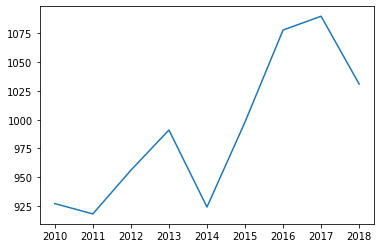

California


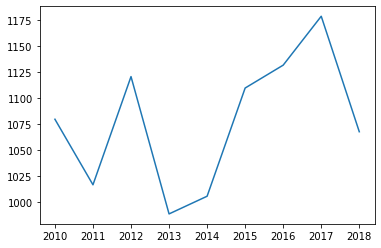

Colorado


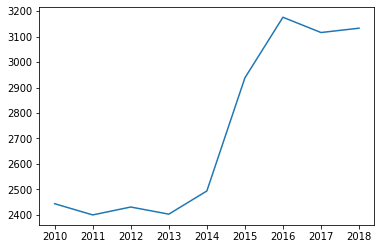

Florida


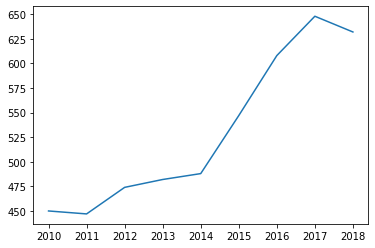

Illinois


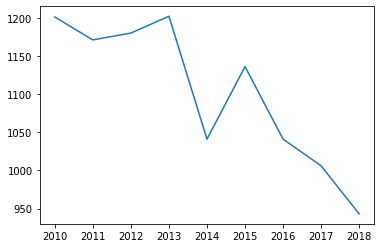

New York


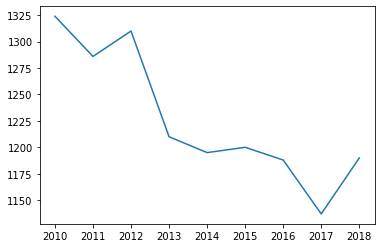

Ohio


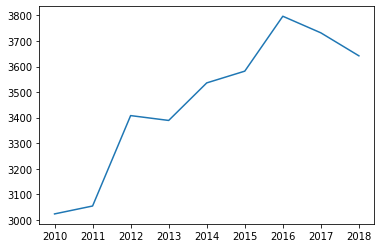

Pennsyvlania


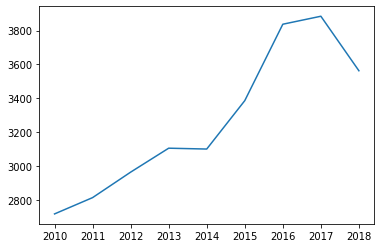

Texas


In [248]:
# plot TotalFatalCrashes per year for each state
states_list = {"6","8","12","17","36","39","42","48"}
counter=()
for states,group in grouped_states['State']:
    x_axis = merged.loc[merged["State"] == states]["CaseYear"]
    y_axis = merged.loc[merged["State"] == states]["TotalFatalCounts"]
    plt.plot(x_axis, y_axis)
    plt.show()
    print(states)
    

In [249]:
# import MAU data for mobile app adoption, reindex
MAU_data = pd.read_csv('MAU_data.csv')
MAU_data = MAU_data.fillna(0)
MAU_data_index = MAU_data.set_index('App')
MAU_data_index


,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
App,,,,,,,,,,,,,,,,,,
Facebook,0.0,0.0,0.0,0.0,0.0,0.0,100000000.0,276000000.0,5.177500e+08,7.660000e+08,9.797500e+08,1.170500e+09,1.334000e+09,1.516750e+09,1.753500e+09,2.035750e+09,2.255250e+09,2.375000e+09
Flickr,0.0,0.0,3675135.0,7399354.0,14949270.0,29299875.0,30000000.0,41834525.0,5.470806e+07,6.695460e+07,7.966489e+07,8.000000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Friendster,3000000.0,4470000.0,5970054.0,7459742.0,8989854.0,24253200.0,51008911.0,28804331.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Google Buzz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.660296e+08,1.700000e+08,1.700000e+08,1.700000e+08,1.700000e+08,1.700000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Google+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.073191e+08,2.056547e+08,2.548590e+08,2.989500e+08,3.986480e+08,4.956570e+08,4.300000e+08,0.000000e+00
Google Messenger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.746000e+07
Hi5,0.0,0.0,0.0,9731610.0,19932360.0,29533250.0,55045618.0,57893524.0,5.995329e+07,4.661085e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Instagram,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.175000e+08,2.500000e+08,4.000000e+08,5.500000e+08,7.500000e+08,1.000000e+09,0.000000e+00
MySpace,0.0,0.0,980036.0,19490059.0,54763260.0,69299875.0,72408233.0,70133095.0,6.804671e+07,4.600354e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [250]:
# drop years from crash data to ones overlapping with MAU data
grouped_years = merged.groupby('CaseYear')
crashes_per_year = grouped_years['TotalFatalCounts'].agg('sum')
#crashes_per_year_trimmed = crashes_per_year.drop(['2018','2017','2016','2015'])
crashes_per_year

CaseYear
2010    13169
2011    13109
2012    13846
2013    13773
2014    13786
2015    14898
2016    15857
2017    15792
2018    15202
Name: TotalFatalCounts, dtype: int32

In [251]:
# drop years from MAU_data to match years in crash data
MAU_data_trimmed = MAU_data_index.drop(['2002','2003','2004','2005','2006','2007','2008','2009','2019'],axis=1)

# transpose data
MAU_trim_trans = MAU_data_trimmed.transpose()
MAU_trim_total = MAU_trim_trans['Total']

# set type to float
MAU_trim_total.astype('float').dtypes
MAU_trim_total

2010    1.552301e+09
2011    2.138454e+09
2012    2.969871e+09
2013    4.238215e+09
2014    5.323580e+09
2015    6.163817e+09
2016    7.491935e+09
2017    8.745886e+09
2018    8.762230e+09
Name: Total, dtype: float64

In [252]:
# set x and y values for scatter plot
x_values = MAU_trim_total
y_values = crashes_per_year
print(x_values)
print(y_values)

2010    1.552301e+09
2011    2.138454e+09
2012    2.969871e+09
2013    4.238215e+09
2014    5.323580e+09
2015    6.163817e+09
2016    7.491935e+09
2017    8.745886e+09
2018    8.762230e+09
Name: Total, dtype: float64
CaseYear
2010    13169
2011    13109
2012    13846
2013    13773
2014    13786
2015    14898
2016    15857
2017    15792
2018    15202
Name: TotalFatalCounts, dtype: int32


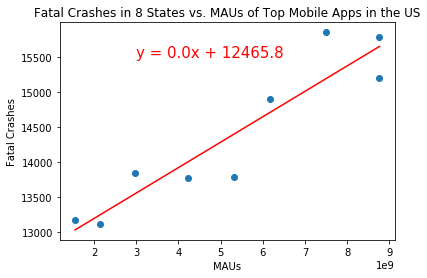

In [270]:
# scatter plot of MAUs of mobile apps vs. Fatal Crashes for 5 years (2010-2014)
plt.scatter(x_values,y_values)
plt.xlabel('MAUs')
plt.ylabel('Fatal Crashes')
plt.title('Fatal Crashes in 8 States vs. MAUs of Top Mobile Apps in the US')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(3000000000,15500),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.show()
plt.show()

In [263]:
# import and read smartphone adoption datafile
phone_adoption_df = pd.read_csv('smartphone adoption.csv')

#trim years to match crash data years
phone_adoption_trim = phone_adoption_df.drop([9,10,11,12,13])

,year,number of smartphone users in US (millions)
0,2010,62.60
1,2011,92.80
2,2012,122.00
3,2013,144.50
4,2014,171.00
5,2015,190.64
6,2016,208.61
7,2017,246.60
8,2018,257.30


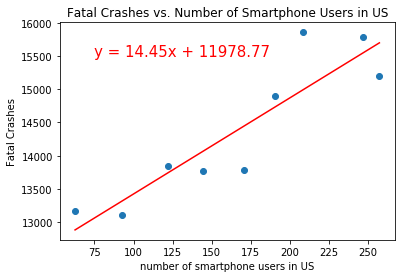

In [269]:
# plot scatterplot and regression line of smartphone users and crash fatalities
x_values2 = phone_adoption_trim['number of smartphone users in US (millions)']
y_values = crashes_per_year
plt.scatter(x_values2,y_values)
plt.title('Fatal Crashes vs. Number of Smartphone Users in US')
plt.xlabel('number of smartphone users in US')
plt.ylabel('Fatal Crashes')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values2, y_values)
regress_values = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(75,15500),fontsize=15,color="red")
plt.plot(x_values2,regress_values,"r-")
plt.show()